In [8]:
# Import necessary libraries
import pandas as pd
import spacy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle

In [9]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

In [10]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [11]:
# Print the first five rows of the DataFrame
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [12]:
df.shape

(962, 2)

In [13]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


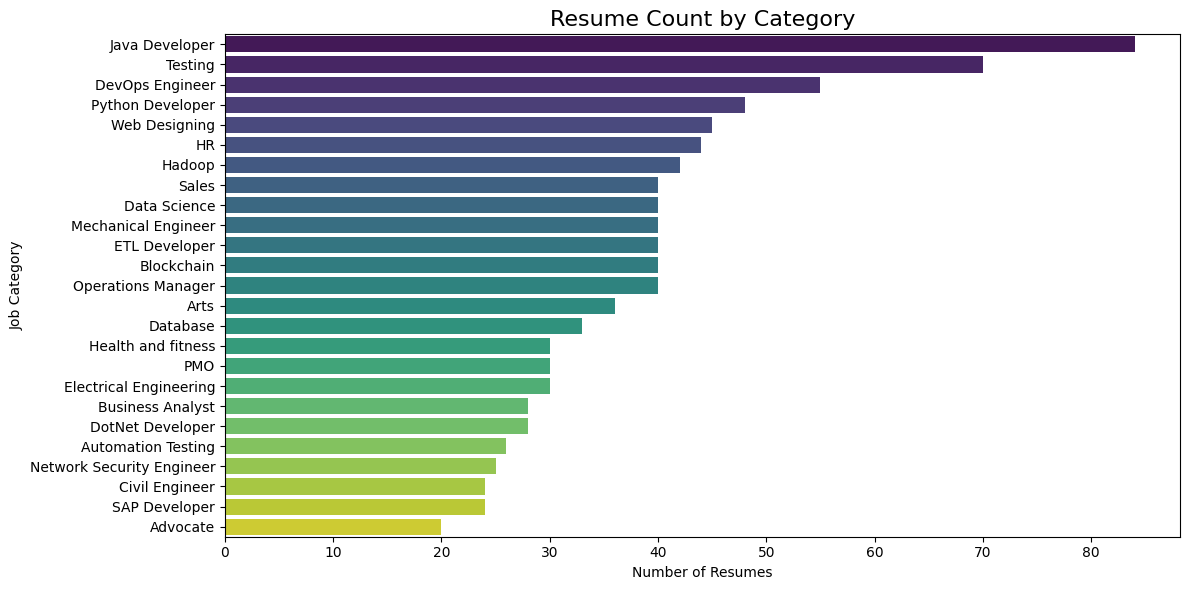

In [14]:
# Value counts as DataFrame for easier plotting
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, y='Category', x='Count', hue='Category', palette='viridis', dodge=False, legend=False)

plt.title("Resume Count by Category", fontsize=16)
plt.xlabel("Number of Resumes")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


In [15]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

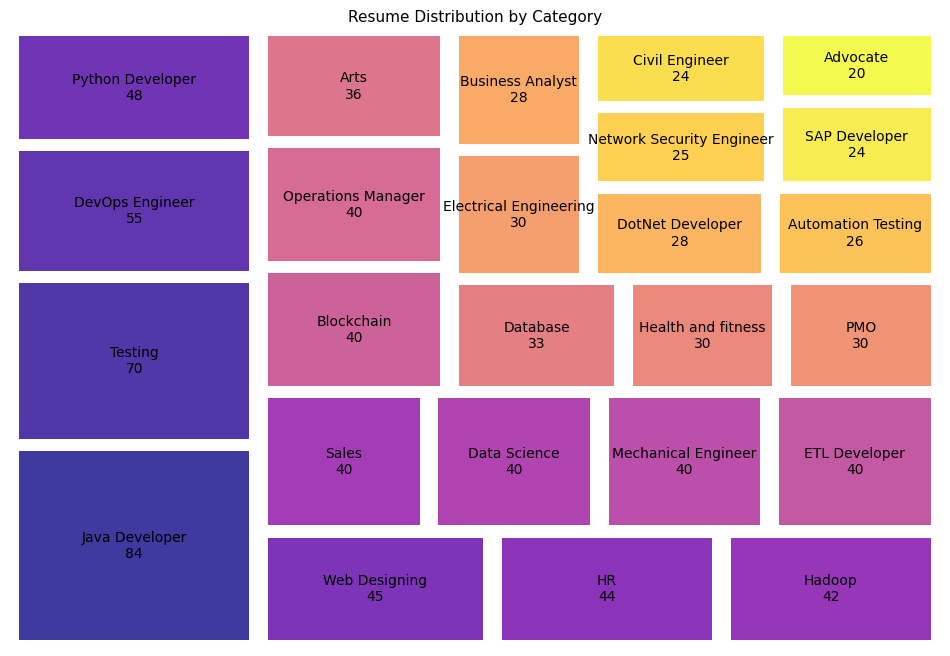

In [16]:
!pip install squarify
import squarify

counts = df['Category'].value_counts()
labels = [f'{label}\n{count}' for label, count in zip(counts.index, counts.values)]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=counts.values, label=labels, color=plt.cm.plasma(np.linspace(0, 1, len(labels))), alpha=.8, pad=True)
plt.axis('off')
plt.title("Resume Distribution by Category", fontsize=11)
plt.show()


In [17]:
# Define a function to preprocess text
def preprocess_text(text):
    # Create a spaCy document object
    doc = nlp(text)

    # Clean the text by removing stop words, punctuation, and non-alphabetic characters
    clean = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            clean.append(token.lemma_.lower())
    # Return the cleaned text as a string
    return " ".join(clean)

In [18]:
# Apply the preprocess_text function to the Resume column and store the result in a new column
df['Resume_text'] = df['Resume'].apply(preprocess_text)

In [19]:
# Print the DataFrame with the new column
df

,Category,Resume,Resume_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming languages python panda numpy...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uit rgpv data scientist data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


In [20]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [21]:
# Encode the Category column and store the result in a new column
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

In [22]:
# Print the first five rows of the DataFrame
df.head()

,Category,Resume,Resume_text,Category_Encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming languages python panda numpy...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uit rgpv data scientist data...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


In [23]:
# Print the value counts of the Category and Category_Encoded columns
df[['Category', 'Category_Encoded']].value_counts()

,,count
Category,Category_Encoded,
Java Developer,15,84
Testing,23,70
DevOps Engineer,8,55
Python Developer,20,48
Web Designing,24,45
HR,12,44
Hadoop,13,42
Data Science,6,40
Blockchain,3,40


In [24]:
# Print the value counts of the Category_Encoded column
df.Category_Encoded.value_counts()

,count
Category_Encoded,
15,84
23,70
8,55
20,48
24,45
12,44
13,42
22,40
6,40


In [25]:
# Print the first element of the Resume column
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [26]:
# Print the first element of the Resume_text column
df.Resume_text[0]

'skill programming languages python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm bayes knn random forest decision trees boost technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch plotly kibana matplotlib ggplot tableau regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details exprience month exprience month exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assist accelerate review process run analytic generate report core member team help develop automate review

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Resume_text'], df['Category_Encoded'], test_size=0.20, random_state=2, stratify=df['Category'])

In [28]:
# Create a pipeline consisting of a TfidfVectorizer and a KNeighborsClassifier
model =Pipeline([('vectorizer', TfidfVectorizer()), ('model', KNeighborsClassifier())])

In [29]:
# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', KNeighborsClassifier())])

In [30]:
# Predict the labels of the test data
y_pred = model.predict(X_test)

In [31]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.73      1.00      0.84         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       0.90      1.00      0.95         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

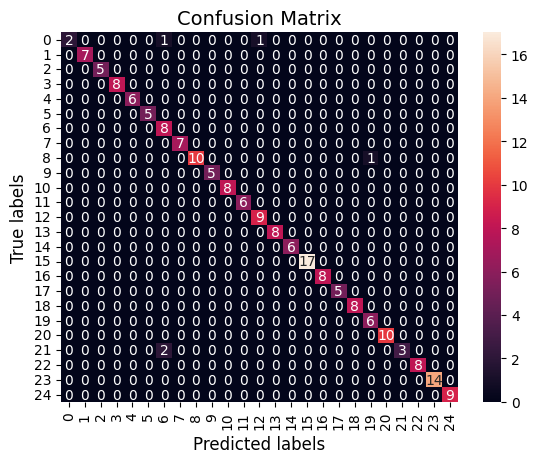

In [32]:
# Compute and display the confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm_matrix, annot=True, ax=ax)

ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

plt.show()

In [33]:
# Print the accuracy score
print(accuracy_score(y_test,y_pred)*100)

97.40932642487047


In [34]:
# Increase TF-IDF feature count
vectorizer = TfidfVectorizer(max_features=500)
X_res_vec = vectorizer.fit_transform(X_train)


In [35]:
# Loosen restrictions on DecisionTree to improve accuracy
param_grid_dt = {
    'max_depth': [5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini', 'entropy']
}

In [36]:
model2 = DecisionTreeClassifier(random_state=42)
clf2 = GridSearchCV(model2, param_grid_dt, cv=5)
clf2.fit(X_res_vec, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10]})

In [37]:
# Predict using the best estimator
X_test_vec = vectorizer.transform(X_test)
yp = clf2.predict(X_test_vec)

In [38]:
acc = accuracy_score(y_test, yp)
print("Accuracy is:", acc*100)

Accuracy is: 89.11917098445595


In [39]:
# Print the classification report
print(classification_report(y_test, yp,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.39      1.00      0.56         7
           2       1.00      0.40      0.57         5
           3       0.80      1.00      0.89         8
           4       0.55      1.00      0.71         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      0.43      0.60         7
           8       1.00      0.91      0.95        11
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       0.82      1.00      0.90         9
          13       1.00      1.00      1.00         8
          14       0.00      0.00      0.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

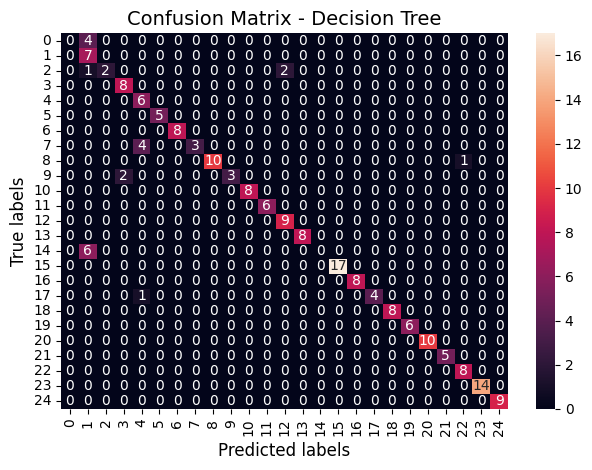

In [40]:
# Compute and display the confusion matrix for Decision Tree
cm_matrix_dt = confusion_matrix(y_test, yp)

ax = plt.subplot()
sns.heatmap(cm_matrix_dt, annot=True, ax=ax)

# Labels and title
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix - Decision Tree', fontsize=14)

plt.tight_layout()
plt.show()

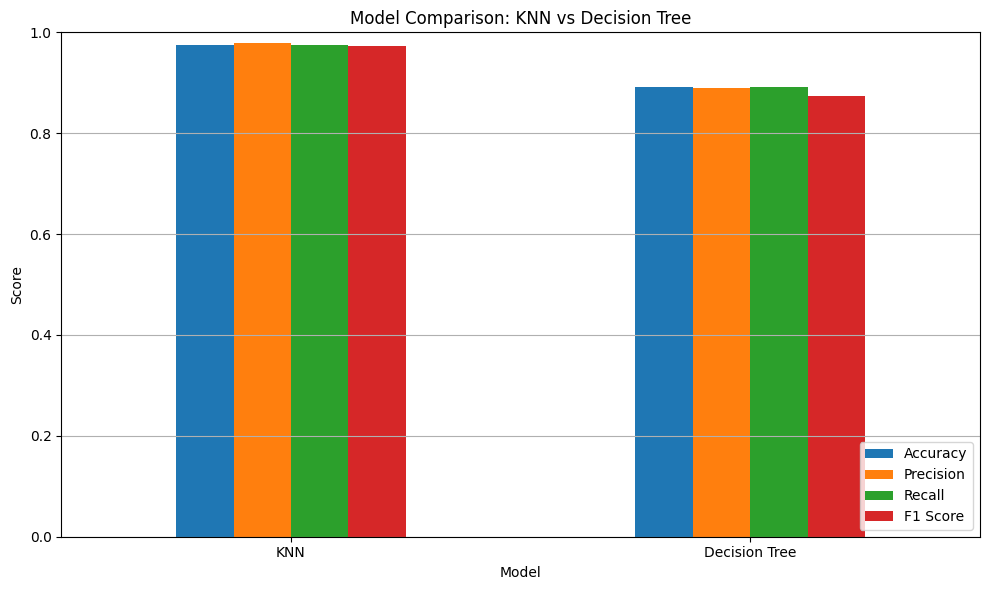

In [41]:
metrics = {
    'Model': ['KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, yp)
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        precision_score(y_test, yp, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, yp, average='weighted', zero_division=0)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, yp, average='weighted', zero_division=0)
    ]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_metrics.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Comparison: KNN vs Decision Tree')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [42]:
import pickle as pkl
filename="model_res.pkl"
pkl.dump(model,open(filename,'wb'))

In [43]:
%%writefile app.py
import streamlit as st
import pickle
import spacy
import re
from wordcloud import WordCloud
from docx import Document
import fitz
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except IOError:
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Load ML model pipeline
with open('model_res.pkl', 'rb') as file:
    model_pipeline = pickle.load(file)

# Job category mapping
category_mapping = {
    15: "Java Developer", 23: "Testing", 8: "DevOps Engineer", 20: "Python Developer",
    24: "Web Designing", 12: "HR", 13: "Hadoop", 3: "Blockchain", 10: "ETL Developer",
    18: "Operations Manager", 6: "Data Science", 22: "Sales", 16: "Mechanical Engineer",
    1: "Arts", 7: "Database", 11: "Electrical Engineering", 14: "Health and fitness",
    19: "PMO", 4: "Business Analyst", 9: "DotNet Developer", 2: "Automation Testing",
    17: "Network Security Engineer", 21: "SAP Developer", 5: "Civil Engineer", 0: "Advocate",
}

# Preprocessing function
def preprocess_text(text):
    doc = nlp(text)
    clean = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return " ".join(clean)

# PDF text extraction
def extract_text_from_pdf(pdf_file):
    with fitz.open(stream=pdf_file.read(), filetype="pdf") as doc:
        return "".join([page.get_text() for page in doc])

# DOCX text extraction
def extract_text_from_docx(docx_file):
    doc = Document(docx_file)
    return "\n".join(para.text for para in doc.paragraphs)

# Category prediction
def predict_category(text):
    cleaned_text = preprocess_text(text)
    prediction_id = model_pipeline.predict([cleaned_text])[0]
    return category_mapping.get(prediction_id, "Unknown")

# Contact info extraction
def extract_contact_info(text):
    email = re.findall(r"\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b", text)
    phone = re.findall(r"\b\d{10}\b|\(\d{3}\)\s*\d{3}-\d{4}", text)
    return email[0] if email else "Not Found", phone[0] if phone else "Not Found"

# Skill extraction
def extract_skills(text, skill_db=None):
    if not skill_db:
        skill_db =  {
    "python", "java", "sql", "excel", "machine learning", "deep learning", "data analysis",
    "django", "flask", "html", "css", "javascript", "project management", "communication",
    "leadership", "teamwork", "agile", "cloud computing", "aws", "azure", "docker", "kubernetes",
    "scrum", "data visualization", "bi", "spark", "hadoop", "tensorflow", "pytorch", "r", "sas",
    "postgresql", "react", "nodejs", "graphql", "swift", "android", "iOS", "salesforce", "SAP",
    "tableau", "power bi", "photoshop", "graphic design", "ruby", "php"
}
    words = set(word.lower() for word in preprocess_text(text).split())
    return list(words & skill_db)

# Download cleaned text
def get_download_link(text, filename="cleaned_resume.txt"):
    b = BytesIO()
    b.write(text.encode())
    b.seek(0)
    b64 = base64.b64encode(b.read()).decode()
    return f'<a href="data:file/txt;base64,{b64}" download="{filename}">📥 Download Cleaned Resume Text</a>'

# Resume improvement suggestions for all job categories
def improvement_suggestions(resume_text, skills_found, email, phone, category):
    suggestions = []
    word_count = len(resume_text.split())

    # Check if the resume is already perfect, no suggestions if everything is ideal
    if word_count >= 300 and email != "Not Found" and re.match(r"\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b", email) and phone != "Not Found" and re.match(r"\b\d{10}\b|\(\d{3}\)\s*\d{3}-\d{4}", phone) and len(skills_found) >= 5:
        return suggestions  # Return empty list if no improvements are needed

    # General suggestions based on word count
    if word_count < 100:
        suggestions.append("➤ Consider adding more detail to your resume, especially in terms of experience and skills.")

    # Contact info suggestions
    if email == "Not Found":
        suggestions.append("➤ Include a valid email address for easier contact.")
    elif not re.match(r"\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b", email):
        suggestions.append("➤ Please use a valid email format (e.g., example@domain.com).")

    if phone == "Not Found":
        suggestions.append("➤ Include a contact number.")
    elif not re.match(r"\b\d{10}\b|\(\d{3}\)\s*\d{3}-\d{4}", phone):
        suggestions.append("➤ Make sure your phone number is in a valid format.")

    # Skills-based suggestions
    if len(skills_found) < 3:
        suggestions.append("➤ Highlight more relevant skills (technical or soft). Consider adding specific skills related to your job role.")

    # Category-specific suggestions for various roles
    role_specific_suggestions = {
        "Python Developer": [
            "➤ Ensure you highlight experience with Python frameworks like Django or Flask.",
            "➤ Mention Machine Learning, Data Science, or automation tools (e.g., Pandas, NumPy, TensorFlow).",
            "➤ Include cloud services experience such as AWS, Azure, or Google Cloud."
        ],
        "Java Developer": [
            "➤ Add experience with Java frameworks like Spring or Hibernate.",
            "➤ Highlight experience in multi-threading and concurrency for performance optimization.",
            "➤ Mention version control systems like Git, and continuous integration tools."
        ],
        "Testing": [
            "➤ Specify your knowledge of testing frameworks (e.g., Selenium, JUnit, or TestNG).",
            "➤ Mention your experience with automated testing and CI/CD pipelines.",
            "➤ Include familiarity with test management tools like Jira or TestRail."
        ],
        "Data Science": [
            "➤ Mention specific data manipulation libraries like Pandas and NumPy.",
            "➤ Highlight experience with machine learning algorithms and libraries (e.g., Scikit-Learn, TensorFlow, or PyTorch).",
            "➤ Ensure to include knowledge of data visualization tools like Matplotlib, Seaborn, or Tableau."
        ],
        "DevOps Engineer": [
            "➤ Add experience with cloud platforms like AWS, Azure, or GCP.",
            "➤ Mention knowledge of CI/CD tools like Jenkins, GitLab CI, or CircleCI.",
            "➤ Specify experience with containerization tools such as Docker and orchestration tools like Kubernetes."
        ],
        "Web Designing": [
            "➤ Highlight experience with HTML, CSS, JavaScript, and front-end frameworks like React or Angular.",
            "➤ Mention your understanding of responsive design and web accessibility standards.",
            "➤ If applicable, include experience with back-end technologies like Node.js or PHP."
        ],
        "HR": [
            "➤ Highlight your experience with HRIS (Human Resource Information Systems) and ATS (Applicant Tracking Systems).",
            "➤ Mention knowledge of employee relations, recruitment, and performance management.",
            "➤ Add relevant certifications like SHRM or HRCI."
        ],
        "Blockchain": [
            "➤ Ensure to mention your knowledge of blockchain platforms like Ethereum, Hyperledger, or Solana.",
            "➤ Highlight experience with smart contracts, decentralized applications (dApps), and cryptocurrency.",
            "➤ Mention your understanding of consensus algorithms and cryptography."
        ],
        "Operations Manager": [
            "➤ Highlight leadership skills and experience with project management tools like Jira or Trello.",
            "➤ Add experience in process optimization, budgeting, and strategic planning.",
            "➤ Mention knowledge of supply chain management and resource planning."
        ],
        "Mechanical Engineer": [
            "➤ Ensure to include your expertise in CAD software (e.g., AutoCAD, SolidWorks, or CATIA).",
            "➤ Mention any experience with product lifecycle management (PLM) and manufacturing processes.",
            "➤ Highlight any certifications such as Six Sigma or Lean Manufacturing."
        ],
        "Sales": [
            "➤ Include experience with CRM tools like Salesforce or HubSpot.",
            "➤ Highlight your understanding of sales methodologies like SPIN Selling or BANT.",
            "➤ Add achievements in sales targets or quotas if applicable."
        ],
        "Database": [
            "➤ Mention experience with database management systems (e.g., MySQL, PostgreSQL, or MongoDB).",
            "➤ Highlight knowledge of database optimization, indexing, and query tuning.",
            "➤ Include familiarity with cloud-based databases and data warehousing solutions."
        ],
        "Network Security Engineer": [
            "➤ Add certifications like CISSP, CEH, or CompTIA Security+. ",
            "➤ Highlight your experience with firewalls, intrusion detection/prevention systems, and VPNs.",
            "➤ Mention familiarity with network protocols, encryption techniques, and security audits."
        ],
        "PMO": [
            "➤ Mention your experience with project management frameworks like PMI or PRINCE2.",
            "➤ Include experience with project scheduling tools like MS Project or Primavera.",
            "➤ Highlight your knowledge of risk management and change management."
        ],
        "Business Analyst": [
            "➤ Highlight experience in gathering business requirements, process mapping, and data analysis.",
            "➤ Mention your familiarity with tools like MS Visio, Tableau, or Power BI.",
            "➤ Include knowledge of Agile and Scrum methodologies."
        ],
        "Civil Engineer": [
            "➤ Include your experience with construction software like AutoCAD or Revit.",
            "➤ Mention your understanding of structural design, materials science, and project management.",
            "➤ Add certifications such as PE (Professional Engineer) or PMP (Project Management Professional)."
        ],
        "Advocate": [
            "➤ Mention specific legal areas of expertise, such as corporate law, family law, or criminal defense.",
            "➤ Highlight your familiarity with legal research tools and case management software.",
            "➤ Include bar association memberships and relevant certifications."
        ]
    }

    # Append role-specific suggestions
    if category in role_specific_suggestions:
        suggestions.extend(role_specific_suggestions[category])

    return suggestions


# Job Role Recommendation (Across different categories)
def recommend_jobs(resume_text):
    # Use category prediction for job roles
    cleaned_text = preprocess_text(resume_text)
    prediction_id = model_pipeline.predict([cleaned_text])[0]
    category = category_mapping.get(prediction_id, "Unknown")

    # List of different categories to recommend
    category_recommendations = {
        "Java Developer": ["HR", "Sales", "Operations Manager", "Mechanical Engineer", "PMO"],
        "Testing": ["Data Science", "Blockchain", "Business Analyst", "Civil Engineer", "Sales"],
        "DevOps Engineer": ["HR", "Project Management", "Data Scientist", "Operations Manager", "Mechanical Engineer"],
        "Python Developer": ["HR", "Marketing", "Database", "Sales", "Network Security Engineer"],
        "Web Designing": ["Data Science", "HR", "Sales", "Civil Engineer", "Mechanical Engineer"],
        "HR": ["Data Science", "Operations Manager", "Sales", "Backend Developer", "Mechanical Engineer"],
        "Data Science": ["Sales", "Web Designing", "Operations Manager", "Mechanical Engineer", "Blockchain"],
        "Database": ["HR", "Operations Manager", "Sales", "Marketing", "Civil Engineer"],
        "Sales": ["Data Science", "Web Designing", "HR", "Backend Developer", "Mechanical Engineer"],
        "Mechanical Engineer": ["Data Science", "HR", "Sales", "PMO", "Database"],
    }

    # Fetch related roles for the predicted category
    recommendations = category_recommendations.get(category, [category])

    return recommendations[:3]  # Return top 3 different job categories

# Streamlit app
def main():
    st.title("Resume Screening and Improvement App")

    uploaded_file = st.file_uploader("Upload Your Resume (PDF, DOCX, or Text file)", type=["pdf", "docx", "txt"])

    if uploaded_file:
        analyze_button = st.button("🔍 Analyze Resume")

        if analyze_button:
            with st.spinner("Analyzing..."):
                # Extract text based on the file type
                if uploaded_file.type == "application/pdf":
                    resume_text = extract_text_from_pdf(uploaded_file)
                elif uploaded_file.type == "text/plain":
                    resume_text = uploaded_file.read().decode("utf-8")
                elif uploaded_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
                    resume_text = extract_text_from_docx(uploaded_file)
                else:
                    st.error("Unsupported file format")
                    return

                # Predict job category
                category = predict_category(resume_text)
                email, phone = extract_contact_info(resume_text)
                skills = extract_skills(resume_text)
                cleaned_text = preprocess_text(resume_text)

                st.success(f"✅ Predicted Job Role: **{category}**")
                st.info(f"📧 Email: {email}  \n📱 Phone: {phone}")
                st.markdown(f"**💡 Top Skills Detected:** {', '.join(skills) if skills else 'None'}")

                # Get improvement suggestions
                suggestions = improvement_suggestions(resume_text, skills, email, phone, category)
                if suggestions:
                    st.subheader("🛠️ Suggestions to Improve Your Resume")
                    for s in suggestions:
                        st.warning(s)

                # Word cloud visualization
                st.subheader("🔤 Word Cloud")
                wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
                fig, ax = plt.subplots()
                ax.imshow(wordcloud, interpolation='bilinear')
                ax.axis("off")
                st.pyplot(fig)

                # Provide a download link for the cleaned resume text
                st.markdown(get_download_link(cleaned_text), unsafe_allow_html=True)

                # Recommend top job roles across different categories
                recommendations = recommend_jobs(resume_text)
                st.subheader("💼 Top Job Recommendations (Different Categories)")
                st.write(", ".join(recommendations))

if __name__ == "__main__":
    main()


Writing app.py


In [44]:
!streamlit run app.py &>/content/logs.txt &

In [46]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.23.14.148
⠙⠹⠸⠼⠴⠦your url is: https://stale-candles-exist.loca.lt
